# Jednadžba ravnoteže

---

Zadana je kvadratna ploča sa stranicama duljine $\pi$. Bočne stranice su izolirane, gornji rub se održava na temperaturi $g(x)$, a donji na temperaturi $0$. Želimo naći stabilno stanje razdiobe temperature $u(x,y)$.

Ignorirajući prijelazne pojave koja ovisi o vremenu dobili smo problem ravnoteže u 2D:

\begin{align*}
&u_{xx}+u_{yy}=0,\quad 0<x,y<\pi\\
&u_x(0,y)=0,\quad u_x(\pi,y)=0,\quad 0<y<\pi \\
&u(x,0)=0,\quad u(x,\pi)=g(x),\quad 0<x<\pi.
\end{align*}

Prema klasfikaciji, PDJ je eliptička, i može se riješiti separacijom varijabli i svođenjem na SLP.

Pretpostavimo da je 

$$
u(x,y)=X(x) \cdot Y(y).
$$

Jednadžba glasi

$$
X''\cdot Y=-Y\cdot X'',
$$

odnosno

$$
\displaystyle\frac{X''}{X}=-\frac{Y''}{Y}=-\lambda.
$$

Iz rubnih uvjeta vidimo da možemo definirati regularni SLP po varijabli $x$:

\begin{align*}
&X''=-\lambda X,\quad 0<x<\pi\\
&X'(0)=0,\quad X'(\pi)=0.
\end{align*}

Kao i do sada, analizirajmo posebno tri slučaja:

---

Za $\lambda=0$ je $X=ax+b$, $X'=a$, pa rubni uvjeti povlače $a=0$. Dakle, $\lambda_0=0$ je svojstvena vrijednost, a $X_0=1$ je pripadna svojstvena funkcija.

Druga jednadžba glasi

$$
Y''=0,
$$

pa je $Y_0(y)=a_0y+b_0$.

---

Za $\lambda<0$ je

\begin{align*}
X&=a e^{\sqrt{-\lambda} x} +b e^{-\sqrt{-\lambda}x},\\
X'&=a\sqrt{-\lambda} e^{\sqrt{-\lambda} x} - b \sqrt{-\lambda}e^{-\sqrt{-\lambda}x}
\end{align*}

pa prvi rubni uvjet povlači 

$$
X'(0)=a\sqrt{-\lambda}- b \sqrt{-\lambda}=0,
$$

odnosno $a=b$. Drugi uvjet glasi 

$$
X'(\pi)=a\sqrt{-\lambda}\big(e^{\sqrt{-\lambda} \pi} -e^{-\sqrt{-\lambda}\pi}\big)=0
$$

pa je $a=b=0$. Funkcija $X=0$ ne može biti svojstvena funkcija pa $\lambda<0$ nije svojstvena vrijednost. 

---

Za $\lambda>0$ je

\begin{align*}
X&=a \sin (\sqrt{\lambda} x) +b \cos (\sqrt{\lambda}x),\\
X'&=a\sqrt{\lambda} \cos(\sqrt{\lambda} x) - b \sqrt{\lambda}\sin(\sqrt{\lambda}x).
\end{align*}

Prvi rubni uvjet povlači 

$$
X'(0)=a\sqrt{\lambda}=0,
$$

odnosno $a=0$. Drugi uvjet glasi 

$$
X'(\pi)=b\sqrt{\lambda}\sin(\sqrt{\lambda}\pi)=0
$$

pa je $\sqrt{\lambda} \pi=n\pi$. Dakle, $\lambda_n=n^2$, $n\in\mathbb{N}$ su svojstvene vrijednosti, a 
$X_n(x)=\cos (nx)$ su pripadne svojstvene funkcije.

Druga jednadžba sada glasi $Y''=n^2Y$ pa je 

$$
Y_n= a_n e^{ny}+b_n e^{-ny}.
$$

Linearna kombinacija dvaju linearno nezavisnih rješenja linearne DJ jednadžbe je također rješenje, pa umjesto ove fromule rješenje možemo zapisati u obliku

$$
Y_n=a_n \sinh (ny)+ b_n \cosh(ny).
$$

Prema principu superpozicije vrijedi

\begin{align*}
u(x,y)&=\sum_{n=0}^\infty u_n(x,y)=\sum_{n=0}^\infty X_n(x) Y_n(y) \\
&= a_0y+b_0 +\sum_{n=1}^\infty [a_n \sinh (ny)+ b_n \cosh(ny)] \cos(nx).
\end{align*}

Rubni uvjet na donjem rubu daje

$$
u(x,0)=b_0 + \sum_{n=1}^\infty b_n \cos(ny)=0
$$

pa je nužno $b_n=0$, $n=1,2,3,\ldots$. Rubni uvjet na gornjem rubu sada povlači

$$
u(x,\pi)= a_0\pi + \sum_{n=1}^\infty a_n \sinh (n\pi) \cos(nx)=g(x).
$$

Radi se o razvoju u generalizirani Fourierov red  u ortonogonalnoj bazi s koeficijentima

\begin{align*}
a_0\pi &= \frac{(1,g(x))}{(1,1)}=\frac{\int\limits_0^\pi g(x)\, dx}{\int\limits_0^\pi 1\cdot 1\, dx},\\
a_n \sinh(n\pi)&= \frac{(g,\cos(nx))}{(\cos(nx),\cos(nx))}=
\frac{\int\limits_0^\pi g(x)\cos(nx)\, dx}{\int\limits_0^\pi \cos^2(nx)\, dx}.
\end{align*}

Konačna razdioba temperature dana je funkcijom

$$
u(x,y)=a_0 y+\sum_{n=1}^\infty a_n \sinh (ny) \cos(nx),
$$

gdje su koeficijenti $A_n$ izračunati iz gornjih formula.

Nacrtajmo rješenje problema za $g(x)=\sin(x)$.

Za simboličko računanje koristimo paket `SymPy.jl`, a za crtanje paket `PyPlot.jl`.

In [1]:
using PyPlot
using SymPy

In [2]:
n=symbols("n",integer=true, positive=true)

n

In [3]:
g(x)=sin.(x)

g (generic function with 1 method)

In [4]:
a0=integrate(x->g(x),0,pi)/pi^2

0.202642367284676

In [5]:
a=integrate(x->g(x)*cos(n*x),0,pi)/integrate(x->cos(n*x)^2,0,pi)/sinh(n*pi)

  //        0          for n = 1\
  ||                            |
  ||      n                     |
2*|<  (-1)       1              |
  ||- ------ - ------  otherwise|
  ||   2        2               |
  \\  n  - 1   n  - 1           /
---------------------------------
          pi*sinh(pi*n)          

In [6]:
# Za neparni n je a(n)=0
N(a(3)), N(a(4))

(0, -5.920296258678921e-7)

In [7]:
# Pripremimo mrežu za crtanje
m=50
X=linspace(0,pi)
Y=linspace(0,pi)
gridX=repmat(X,1,m)
gridY=repmat(Y',m,1);

In [8]:
using Interact

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 5 Int64 , "l", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal")

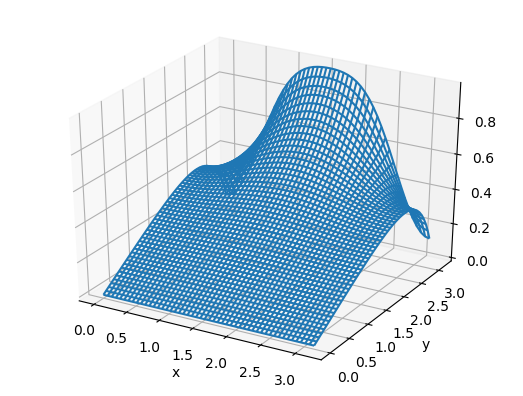

In [10]:
f=figure()
@manipulate for l=1:10; withfig(f) do
        u=N(a0)*gridY+sum([N(a(k))*sinh.(k*gridY).*cos.(k*gridX) for k in collect(1:l)]) 
        mesh(X,Y,u')
        xlabel("x")
        ylabel("y")
    end
end

In [11]:
# Provjera rubnog uvjeta
x=linspace(0,pi)
y=g(x)
z=N(a0)*pi+sum([N(a(k))*sinh.(k*pi)*cos.(k*x) for k=1:10])

50-element Array{Float64,1}:
 0.0578745
 0.0719484
 0.111859 
 0.171317 
 0.241779 
 0.314674 
 0.383441 
 0.444737 
 0.498529 
 0.547151 
 0.593766 
 0.640833 
 0.689121 
 ⋮        
 0.640833 
 0.593766 
 0.547151 
 0.498529 
 0.444737 
 0.383441 
 0.314674 
 0.241779 
 0.171317 
 0.111859 
 0.0719484
 0.0578745

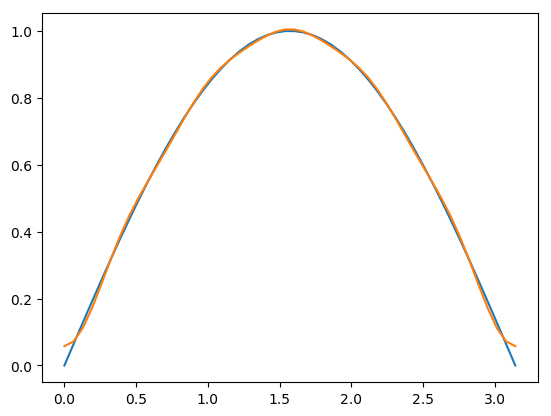

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026345860>
 PyObject <matplotlib.lines.Line2D object at 0x0000000026345F98>

In [12]:
plot(x,y,x,z)